LEVEL 3

Task 1 : Restaurant Reviews

Analyze the text reviews to identify the most common positive and negative keywords.

Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [1]:
pip install pandas matplotlib seaborn geopandas


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
# Load the CSV file
data = pd.read_csv('/content/Dataset .csv')


In [4]:
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [5]:
# Analyze positive and negative keywords
from sklearn.feature_extraction.text import CountVectorizer

positive_reviews = data[data['Aggregate rating'] > 4]['Rating text']
negative_reviews = data[data['Aggregate rating'] < 3]['Rating text']

vectorizer = CountVectorizer(stop_words='english')
positive_word_counts = vectorizer.fit_transform(positive_reviews).toarray().sum(axis=0)
negative_word_counts = vectorizer.fit_transform(negative_reviews).toarray().sum(axis=0)

# Identify most common words
positive_words = vectorizer.get_feature_names_out()[positive_word_counts.argsort()[-10:]]
negative_words = vectorizer.get_feature_names_out()[negative_word_counts.argsort()[-10:]]

print("Common Positive Words:", positive_words)
print("Common Negative Words:", negative_words)


Common Positive Words: ['average' 'poor']
Common Negative Words: ['poor' 'average' 'rated']


Average review length (in characters): 7.020730813527379


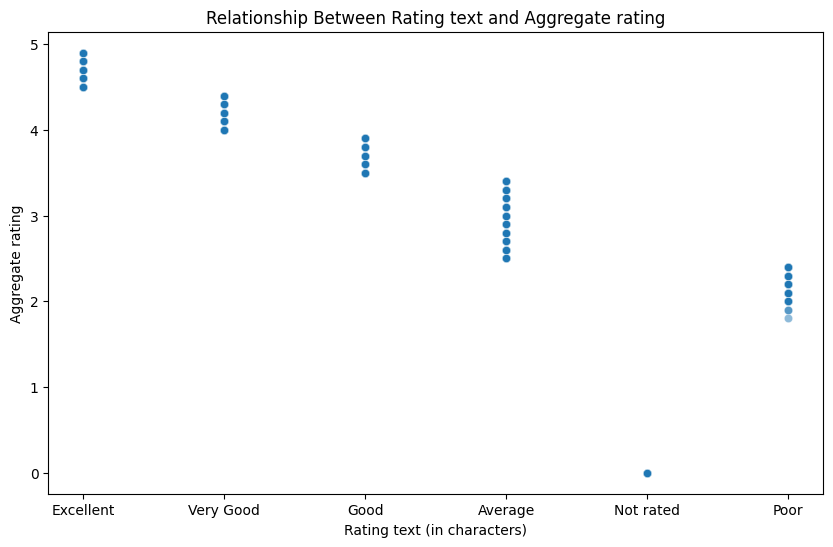

Correlation between Rating text (numerical) and Aggregate rating: 0.93


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Calculate the length of each review
data['review_length'] = data['Rating text'].apply(lambda x: len(str(x)))  # Length in characters

# Step 2: Calculate the average review length
average_review_length = data['review_length'].mean()
print(f"Average review length (in characters): {average_review_length}")

# Step 3: Explore the relationship between review length and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating text', y='Aggregate rating', data=data, alpha=0.5)
plt.title("Relationship Between Rating text and Aggregate rating")
plt.xlabel("Rating text (in characters)")
plt.ylabel("Aggregate rating")
plt.show()


# Convert Rating text to numerical values
rating_mapping = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1
}

data['Rating text (numerical)'] = data['Rating text'].map(rating_mapping)

# Calculating the correlation between the numerical rating text and aggregate rating
correlation = data[['Rating text (numerical)', 'Aggregate rating']].corr().iloc[0, 1]
print(f"Correlation between Rating text (numerical) and Aggregate rating: {correlation:.2f}")



Task 2: Votes Analysis

Identify the restaurants with the highest and lowest number of votes.

Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [10]:
# Restaurants with highest and lowest votes
most_votes = data.nlargest(1, 'Votes')[['Restaurant Name', 'Votes']]
least_votes = data.nsmallest(1, 'Votes')[['Restaurant Name', 'Votes']]
print("Restaurant with the most votes:\n", most_votes)
print("Restaurant with the least votes:\n", least_votes)

# Correlation between votes and rating
correlation = data[['Votes', 'Aggregate rating']].corr()
print("Correlation between votes and rating:\n", correlation)


Restaurant with the most votes:
     Restaurant Name  Votes
728            Toit  10934
Restaurant with the least votes:
      Restaurant Name  Votes
69  Cantinho da Gula      0
Correlation between votes and rating:
                      Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


Task 3 : Price Range vs. Online Delivery and Table Booking

Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

Determine if higher-priced restaurants are more likely to offer these services.

In [11]:
# Analyze relationship between price range and online delivery/table booking
price_delivery = pd.crosstab(data['Price range'], data['Has Online delivery'])
price_booking = pd.crosstab(data['Price range'], data['Has Table booking'])

print("Price Range vs. Online Delivery:\n", price_delivery)
print("Price Range vs. Table Booking:\n", price_booking)


Price Range vs. Online Delivery:
 Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53
Price Range vs. Table Booking:
 Has Table booking    No  Yes
Price range                 
1                  4443    1
2                  2874  239
3                   764  644
4                   312  274


[3 4 2 1]


<Figure size 1000x600 with 0 Axes>

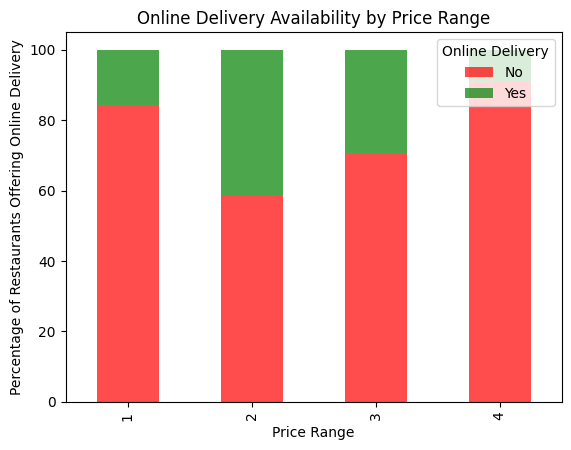

<Figure size 1000x600 with 0 Axes>

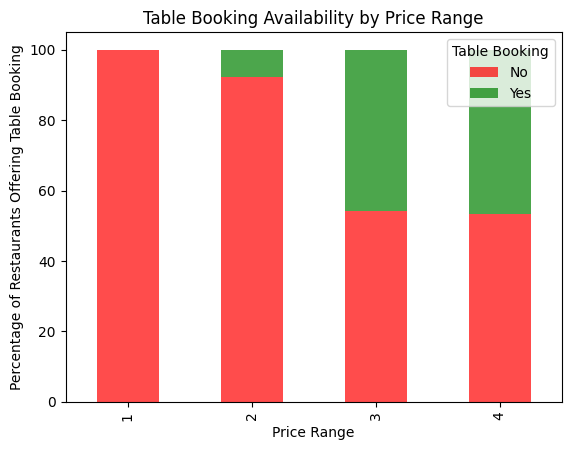

P-value for online delivery: 0.0000
P-value for table booking: 0.0000


In [12]:


# Check the unique price range values
print(data['Price range'].unique())

# Step 1: Cross-tabulations for price range vs. online delivery and table booking
delivery_vs_price = pd.crosstab(data['Price range'], data['Has Online delivery'], normalize='index') * 100
booking_vs_price = pd.crosstab(data['Price range'], data['Has Table booking'], normalize='index') * 100

# Step 2: Plot the relationship between price range and online delivery
plt.figure(figsize=(10, 6))
delivery_vs_price.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants Offering Online Delivery")
plt.legend(title='Online Delivery', loc='upper right')
plt.show()

# Step 3: Plot the relationship between price range and table booking
plt.figure(figsize=(10, 6))
booking_vs_price.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.title("Table Booking Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants Offering Table Booking")
plt.legend(title='Table Booking', loc='upper right')
plt.show()

# Optional: Chi-square test to check for statistical significance
from scipy.stats import chi2_contingency

# Test for online delivery
chi2_delivery, p_delivery, _, _ = chi2_contingency(pd.crosstab(data['Price range'], data['Has Online delivery']))
print(f"P-value for online delivery: {p_delivery:.4f}")

# Test for table booking
chi2_booking, p_booking, _, _ = chi2_contingency(pd.crosstab(data['Price range'], data['Has Table booking']))
print(f"P-value for table booking: {p_booking:.4f}")
